# Probability Distributions Exercises

### There are a large number of distributions used in statistical applications. This lesson will focus on:
### Uniform distributions, Binomial distributions, Normal distributions and Poisson distributions.

### Uniform distributions have equal likelihoods among all outcomes, like a fair coin.
### Binomial distributions are all about determining a binary outcome of an event. Success/failure, for example.
### Normal distributions model a continuous random variable.
### Poisson distributions model a certain amount of events occuring over a time interval
    

In [1]:
#Importing libraries:-

#For creating visualizations and plots.
import matplotlib.pyplot as plt 
#For numerical computing and array operations.
import numpy as np
#For data manipulation and analysis.
import pandas as pd
#For statistical data visualization.
import seaborn as sns
# For statistical functions and distributions.
from scipy import stats


### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.


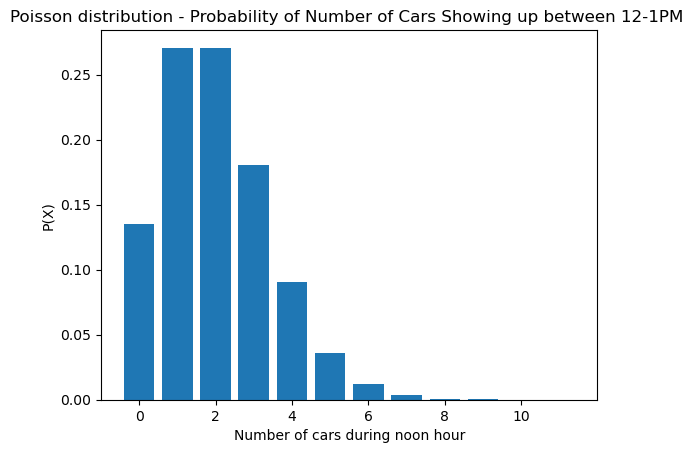

In [69]:
λ = 2
# create a NumPy array x, which represents the possible number of cars 
# that can wait at the drive-up window during the noon hour. It contains values from 0 to 11.
x = np.arange(0,12)

#calculates the probabilities (PMF) of observing each value in array 'x' 
#under the Poisson distribution with a mean of 'λ' 
y = stats.poisson(λ).pmf(x)


#for each value of 'n' in the domain. 
#The resulting list prob contains the probabilities of observing 0, 1, 2, ..., up to 12 cars at the drive-up window.
plt.bar(x,y)
plt.title('Poisson distribution - Probability of Number of Cars Showing up between 12-1PM ')
plt.xlabel('Number of cars during noon hour')
plt.ylabel('P(X)');



### What is the probability that no cars drive up in the noon hour?


In [139]:
# probability of exactly 0?
λ = 2 
stats.poisson(λ).pmf(0)


0.1353352832366127

In [68]:
#rounding to 2 decimal places
round(stats.poisson(λ).pmf(0), 2)

0.14


### What is the probability that 3 or more cars come through the drive through?


In [ ]:
Here, we are looking for probability of X or *more* happening.
Hence, survival function.
Since sf is exclusive, pass the right value in.

In [140]:
# probability of 3 or more?
stats.poisson(λ).sf(2)

0.32332358381693654


### How likely is it that the drive through gets at least 1 car?


In [ ]:
survival function once again here

In [71]:
# probability of 1 or more?
stats.poisson(λ).sf(0)

0.8646647167633873

In [73]:
# or
1 - stats.poisson(λ).pmf(0)

0.8646647167633873

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?
What GPA constitutes the bottom 15% of the class?
An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
If I have a GPA of 3.5, what percentile am I in?

It's a normal distribution
mean = 3.0
std = 0.3
===> values at the right side of the distribution tail
I have the P, I want the X! inverse survivial function

In [74]:
μ = 3.0
σ = 0.3
grade = stats.norm(μ, σ)

### What grade point average is required to be in the top 5% of the graduating class?


In [75]:
# use isf when value is (>) 
grade.isf(.05)

3.4934560880854417

In [11]:
#or the opposite is true as well
# use ppf when value is (<=) 
grade.ppf(0.95)

3.4934560880854417

### What GPA constitutes the bottom 15% of the class?

In [13]:
# use ppf when value is given(<=) 
grade.ppf(.15)

2.689069983151863

In [14]:
#the opposite is also true
# use isf when value is (>) 
grade.isf(.85)

2.689069983151863

### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?


In [ ]:
NOTE:
1st decile: 0-10 percentile
2nd decile:10-20 percentile
3rd decile: 20-30 percentile

In [ ]:
the range of the third decile is 20 -30 percentile

In [135]:
#we want to know the X value for where the probability sits in *two* places this time
#so we use ppf to find the X based on the probability
range_of_3rddecile= grade.ppf([.20,.30])
range_of_3rddecile

array([2.74751363, 2.84267985])

In [138]:
#check our work
(range_of_3rddecile[0] < 2.8) and (range_of_3rddecile[1] > 2.8)


True

### If I have a GPA of 3.5, what percentile am I in?

In [17]:
grade.cdf(3.5)

0.9522096477271853

In [18]:
grade.sf(3.5)

0.0477903522728147

In [77]:
round(grade.sf(3.5),2)

0.05

In [79]:
#or

# lets get the values associated with those percentiles
# so we know what gpa values we need to be between in order to qualify for this scholarship
grade_lower = grade.ppf(0.2)
grade_higher = grade.ppf(0.3)

In [80]:
grade_lower,grade_higher

(2.7475136299281258, 2.842679846187588)

In [82]:
grade_for_gpa_qualification = 2.8
grade_lower < grade_for_gpa_qualification < grade_higher

True

In [83]:
higher_fence = grade.ppf([0.2,0.3])[1]

In [86]:
lower_fence, higher_fence  = grade.ppf((0.2,0.3))
lower_fence < grade_for_gpa_qualification < higher_fence

True

### 3.A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?



rate of success: 2%
number of trials: 4326
If I thought about this as a poisson: lambda, the mean of events happening over a window
would be 0.02 * 4326

In [20]:
n_trials = 4326
p= .02
click_throughs = stats.binom(n_trials, p)

In [90]:
# probability of exactly 97?
click_throughs.pmf(97)

0.021942930454375544

In [89]:
# probability of 97 or more?
click_throughs.sf(96)

0.13975823631416448

In [ ]:
#or

In [ ]:

Walkthrough using simulation

In [22]:
clicks= np.random.choice([0,1], (10_000, 4326), p = [.98,.02])
clicks

#([0,1] is click or not- true / false)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
(clicks.sum(axis=1) >96).mean()

0.138

In [ ]:
Walkthrough using poisson approximation

In [24]:
λ = n_trials* p
stats.poisson(λ).sf(96)

0.14211867659283192

### 4.You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

### What is the probability that at least one of your first 60 answers is correct?

In [ ]:
# type of distribution: binomial
# number of trials?
# 60, we are only looking at the first 60 trials
# prob of success?
# 0.01 because we are looking at hundreths place decimals


In [ ]:
Walkthrough using binomial:

In [25]:
n_trials = 60
p= 0.01

stats.binom(n_trials, p).sf(0)

0.45284335760923855

In [93]:
# or

In [ ]:
Walkthrough using simulation:

In [26]:
((np.random.choice([0,1], (10_000, 60), p= [0.99,0.01])).sum(axis = 1)>0).mean()


0.4533

### 5.The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?



In [94]:
#Type of distro : binomial
#Number of trials: ?
# success rate: 0.03
# num trials: 3 * 22 * 0.9
students_in_one_cohort = 22
num_cohorts = 3
prop_students = 0.9
num_trials = students_in_one_cohort * num_cohorts * prop_students

In [95]:
# make sure our number of trials is an integer!
num_trials = round(num_trials)

In [96]:
prob_clean = 0.03
clean_dist = stats.binom(num_trials, prob_clean)

In [97]:
# break area gets cleaned at least once in a day?
clean_dist.sf(0)

0.8342199288437352

In [106]:
# how likely is it that it goes two days without cleaning?
# twice as many trials!
# probability of exactly zero times cleaned over two days:
clean_dist = stats.binom(num_trials * 2, prob_clean).pmf(0)
clean_dist



0.027483031992576134

In [107]:
#can also use cdf
clean_dist_2days = stats.binom(num_trials * 2, prob_clean).cdf(0)
clean_dist_2days 

0.02748303199257622

In [99]:
# what about one week?
clean_dist = stats.binom(num_trials * 5, prob_clean)
clean_dist.pmf(0)

0.00012521651388091245

### 6.You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [113]:
# normal distribution, but I want to know about if I will have enough time to eat!
# so, lets look at the people in terms of minutes
# 2 minutes for each person to order
# average of 15 folks
# standard deviation of 3 folks
# normal dist for time: (15*2), standard dev for time: (3*2)
panaderia_dist = stats.norm((15*2), (3*2))

In [ ]:
# lunch break stats:
# 60 minutes at start:
# 10 minutes to get my food
# 2 minutes for *me* to order

In [114]:
lunch_break = 60
time_waiting = 10
time_ordering = 2
time_bank = lunch_break - time_waiting - time_ordering


In [115]:
# take away the time I have to eat, which gives me the maximum amount of time
# that people could take up in line outside of the static values
# that I need in order to CONSUME
time_bank = time_bank - 15

In [116]:
panaderia_dist.cdf(time_bank)


0.6914624612740131

### 7.Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.What percent of employees earn less than 60,000?
### What percent of employees earn more than 95,000?What percent of employees earn between 65,000 and 80,000? What do the top 5% of employees make? Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so:




In [ ]:
IMPORTANT:
For this exercises, you will need to add your .gitignore as well as your env.py to this repo.

In [120]:
from env import get_db_url
from sqlalchemy import create_engine, text

In [121]:
def get_db_url(db, username=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

   

In [122]:
url = get_db_url('employees')
query = text('SELECT * FROM salaries where to_date >now()')
engine = create_engine(url)
salaries = pd.read_sql(query, engine.connect())

In [123]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [124]:
# we are getting our mu/mean and our sigma/stdev from the data itself
#Let's get the mean
mean= salaries.salary.mean()
mean

72012.23585730705

In [125]:
#Let's get the standard deviation
std_dev= salaries.salary.std()
std_dev

17309.995380251985

### A. What percent of employees earn less than 60,000?

In [127]:
stats.norm(mean, std_dev).cdf(60000)

0.24385742480214434

In [ ]:
#or

In [133]:
(salaries.salary < 60_000).sum() / len(salaries.salary)

0.2705727041028802

### B. What percent of employees earn more than 95,000?


In [128]:
stats.norm(mean, std_dev).sf(95000)


0.09208819199804058

### C. What percent of employees earn between 65,000 and 80,000?

In [129]:
#another way to complete same problem
np.diff(stats.norm(mean, std_dev).cdf([65000,80000]))

array([0.33506057])

In [ ]:
#or

In [132]:
((salaries.salary > 65_000) & (salaries.salary < 80_000)).sum() / len(salaries.salary)

0.325107028035515

In [ ]:
D. What do the top 5% of employees make?

In [130]:
stats.norm(mean, std_dev).isf(.05)

100484.64454102777

In [131]:
#or
#inversely
stats.norm(mean, std_dev).ppf(.95)

100484.64454102775